
# Introduction to Machine Learning


## What is Machine Learning?


[CSE 250 - Machine Learning](https://byuistats.github.io/CSE250-Larson/course-materials/machine-learning/)

## Coding example

### Setup

In [ ]:
# libraries
import pandas as pd

# the Iris dataset GitHub link
url = "https://byuistats.github.io/CSE250-Larson/course-materials/machine-learning/iris.csv"

# use the pandas library to put the data into a useable format
# called a dataframe
data = pd.read_csv(url)

## The data

In [ ]:
# output the dataframe
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Features

In [ ]:
# print out the column headings using a pandas dataframe attribute
[print(col) for col in data.columns]; # https://www.w3schools.com/python/python_lists_comprehension.asp

sepal_length
sepal_width
petal_length
petal_width
species


This is what we will use to separate the data when we put it into our model.

### Target Values

In [ ]:
# print out the species of iris
[print(species) for species in data.species.unique()];

Iris-setosa
Iris-versicolor
Iris-virginica


These are the values we are looking to predict based on the features from above.

This is the point where we would normally do EDA or exploratory data analysis. We want to know what our data looks like so that we can figure out how to manipulate the data to help our model perform better. 

Data in the real world is messy and generally we have to do a lot of cleaning, preparing, and formatting to get the data to be useable in a model. The Iris dataset comes very clean for our use, this is not typical of the real world. We will be looking at some data cleaning as a part of our semester project.

## The Model

### Split the data
This is known as a train test split

In [ ]:
from sklearn.model_selection import train_test_split

# features = [sepal_length, sepal_width, petal_length, petal_width]
# targets = [species]

# Features or predictors
features = data.drop(columns=['species'])
# Target
targets = data['species']

# Randomize and split the samples into two groups.
# 30% of the samples will be used for testing.
# The other 70% will be used for training.

# train_data, test_data, train_targets, test_targets = train_test_split(features, targets, test_size=.3)
train_data, test_data, train_targets, test_targets = train_test_split(features, targets, test_size=.3)

There are various ways we can do this to help our model utilize our data, like we could split the training data again and have a "dev" set or a holdout set for testing our model's results. We will look at these options in the future.

## The Results

In [ ]:
# Training the data
from sklearn.naive_bayes import GaussianNB

# This is a class for the model we are using
classifier = GaussianNB() 

# We have to fit the model to the data
classifier.fit(train_data, train_targets);

In [ ]:
# Now that the model is fit, we can use it to predict things
# using our test data

predictions = classifier.predict(test_data)

In [ ]:
# We can now look at the accuracy of our model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_targets, predictions)

print('Accuracy: %2.2f' %(accuracy * 100), end='%')

Accuracy: 95.56%

## Another Example

  Test
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

  Holdout
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.82      0.90        11
 Iris-virginica       0.71      1.00      0.83         5

       accuracy                           0.92        24
      macro avg       0.90      0.94      0.91        24
   weighted avg       0.94      0.92      0.92        24



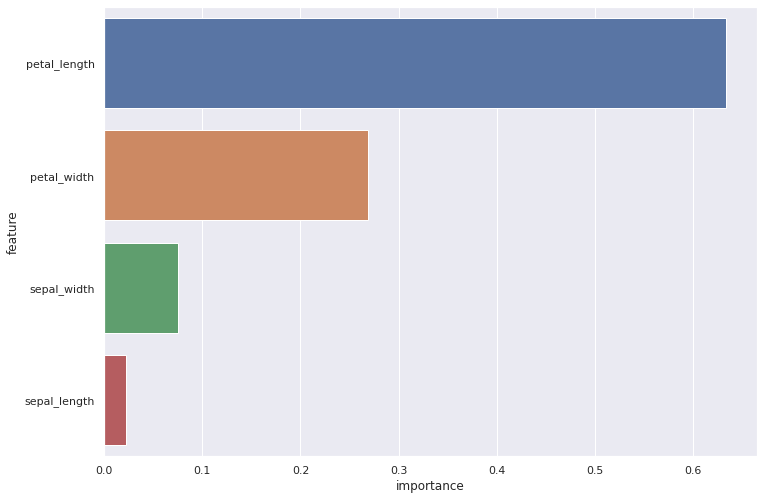

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score, plot_roc_curve, classification_report
import seaborn as sns

# Train Test Split with Holdout
X = features.copy()
y = targets.copy()

X, X_test, y, y_test = train_test_split(X, y, random_state=42, train_size=0.8)
X_train, X_dev, y_train, y_dev = train_test_split(X, y, random_state=42, train_size=0.8)

# Fit differnt model type
model = XGBClassifier()
model.fit(X_train, y_train)

# Preditions
predictions = model.predict(X_test)
holdout_predictions = model.predict(X_dev)

# Results
print('=' * 60)
print("  Test")
print('=' * 60)
print(classification_report(y_test, predictions))
print('=' * 60)
print("  Holdout")
print('=' * 60)
print(classification_report(y_dev, holdout_predictions))
print('=' * 60)

# Feature Importance
importance = model.feature_importances_

df = pd.DataFrame(list(zip(importance, X.columns.to_list())),
                  columns=['importance', 'feature'])

df = df.sort_values(by='importance', ascending=False)
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.barplot(data=df, x='importance', y='feature');